In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,  plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import acquire
import prepare as prep
import knear
import model as mod
import model1 as mod1
# ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
titanic = prep.prep_titanic()
titanic

csv file found and loaded


,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,0,0,30.0000,C,1,1,0,0


In [3]:
df = prep.split_data(titanic, 'survived')
df

(     passenger_id  survived  pclass     sex  sibsp  parch      fare embarked  \
 455           455         1       3    male      0      0    7.8958        C   
 380           380         1       1  female      0      0  227.5250        C   
 492           492         0       1    male      0      0   30.5000        S   
 55             55         1       1    male      0      0   35.5000        S   
 243           243         0       3    male      0      0    7.1250        S   
 ..            ...       ...     ...     ...    ...    ...       ...      ...   
 695           695         0       2    male      0      0   13.5000        S   
 128           128         1       3  female      1      1   22.3583        C   
 636           636         0       3    male      0      0    7.9250        S   
 222           222         0       3    male      0      0    8.0500        S   
 496           496         1       1  female      1      0   78.2667        C   
 
      alone  sex_male  emb

In [4]:
train,validate,test = df
train

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,0,2,male,0,0,13.5000,S,1,1,0,1
128,128,1,3,female,1,1,22.3583,C,0,0,0,0
636,636,0,3,male,0,0,7.9250,S,1,1,0,1
222,222,0,3,male,0,0,8.0500,S,1,1,0,1


In [5]:
train = train.drop(columns=['sex'])
validate = validate.drop(columns=['sex'])
test = test.drop(columns=['sex'])


In [6]:
train = train.drop(columns=['embarked'])
validate = validate.drop(columns=['embarked'])
test = test.drop(columns=['embarked'])

In [7]:
train = train.drop(columns=['embarked_Q'])
validate = validate.drop(columns=['embarked_Q'])
test = test.drop(columns=['embarked_Q'])


In [8]:
train = train.drop(columns=['embarked_S'])
validate = validate.drop(columns=['embarked_S'])
test = test.drop(columns=['embarked_S'])

In [9]:
train = train.drop(columns=['parch'])
validate = validate.drop(columns=['parch'])
test = test.drop(columns=['parch'])

In [10]:
train = train.drop(columns=['sibsp'])
validate = validate.drop(columns=['sibsp'])
test = test.drop(columns=['sibsp'])

In [11]:
train

,passenger_id,survived,pclass,fare,alone,sex_male
455,455,1,3,7.8958,1,1
380,380,1,1,227.5250,1,0
492,492,0,1,30.5000,1,1
55,55,1,1,35.5000,1,1
243,243,0,3,7.1250,1,1
...,...,...,...,...,...,...
695,695,0,2,13.5000,1,1
128,128,1,3,22.3583,0,0
636,636,0,3,7.9250,1,1
222,222,0,3,8.0500,1,1


In [12]:
X_train = train.iloc[:,2:]
X_validate = validate.iloc[:,2:]
X_test = test.iloc[:,2:]
X_train

,pclass,fare,alone,sex_male
455,3,7.8958,1,1
380,1,227.5250,1,0
492,1,30.5000,1,1
55,1,35.5000,1,1
243,3,7.1250,1,1
...,...,...,...,...
695,2,13.5000,1,1
128,3,22.3583,0,0
636,3,7.9250,1,1
222,3,8.0500,1,1


In [13]:
target = 'survived'
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

In [14]:
#baseline accuracy
(y_train == 0).mean()

0.6161048689138576

In [15]:
X_train

,pclass,fare,alone,sex_male
455,3,7.8958,1,1
380,1,227.5250,1,0
492,1,30.5000,1,1
55,1,35.5000,1,1
243,3,7.1250,1,1
...,...,...,...,...
695,2,13.5000,1,1
128,3,22.3583,0,0
636,3,7.9250,1,1
222,3,8.0500,1,1


# 1
Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [16]:
#make the thing
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
#fit it
knn.fit(X_train, y_train)
#predict
y_pred = knn.predict(X_train)
y_pred[:5]

array([0, 1, 1, 0, 0])

# 2
Evaluate your results using the model score, confusion matrix, and classification report.



In [17]:
knn.score(X_train, y_train)

0.8127340823970037

In [18]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[279,  50],
       [ 50, 155]])

In [19]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [20]:
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,279,50
1_actual,50,155


In [21]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534



# 3
Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [22]:
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,279,50
1_actual,50,155


In [23]:
# Survived = positive
TP = 155
TN = 280
FP = 49
FN = 50

acc = (TP+TN)/(TP+TN+FP+FN)
total = (TP+TN+FP+FN)
true_positive_rate = TP/(total)
false_positive_rate = FP/(total)
true_negative_rate = TN/(total)
false_negative_rate = FN/(total)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = (2 * (precision * recall) / (precision + recall))
support_pos = FN + TP
support_neg = TN + FP

print('acc =',acc)
print('true positive rate =',true_positive_rate) 
print('true negative rate =', true_negative_rate)
print('false positive rate =', false_positive_rate)
print('false negative rate =', false_negative_rate)
print('precision =',precision)
print('recall =',recall)
print('f1 score =', f1_score)
print('positive support =', support_pos)
print('negative support =', support_neg)

acc = 0.8146067415730337
true positive rate = 0.2902621722846442
true negative rate = 0.5243445692883895
false positive rate = 0.09176029962546817
false negative rate = 0.09363295880149813
precision = 0.7598039215686274
recall = 0.7560975609756098
f1 score = 0.7579462102689486
positive support = 205
negative support = 329


# 4
Run through steps 1-3 setting k to 10



In [24]:
#make the thing
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
#fit it
knn10.fit(X_train, y_train)
#predict
y_pred10 = knn10.predict(X_train)
y_pred10[:5]
 

array([0, 1, 1, 0, 0])

In [25]:
knn10.score(X_train, y_train)

0.7865168539325843

In [26]:
conf10 = confusion_matrix(y_train, y_pred10)
conf10

array([[282,  47],
       [ 67, 138]])

In [27]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [28]:
pd.DataFrame(conf10,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,282,47
1_actual,67,138


In [29]:
# Survived = positive
TP = 132
TN = 286
FP = 44
FN = 73

acc = (TP+TN)/(TP+TN+FP+FN)
total = (TP+TN+FP+FN)
true_positive_rate = TP/(total)
false_positive_rate = FP/(total)
true_negative_rate = TN/(total)
false_negative_rate = FN/(total)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = (2 * (precision * recall) / (precision + recall))
support_pos = FN + TP
support_neg = TN + FP

print('acc =',acc)
print('true positive rate =',true_positive_rate) 
print('true negative rate =', true_negative_rate)
print('false positive rate =', false_positive_rate)
print('false negative rate =', false_negative_rate)
print('precision =',precision)
print('recall =',recall)
print('f1 score =', f1_score)
print('positive support =', support_pos)
print('negative support =', support_neg)

acc = 0.7813084112149533
true positive rate = 0.2467289719626168
true negative rate = 0.5345794392523364
false positive rate = 0.08224299065420561
false negative rate = 0.13644859813084112
precision = 0.75
recall = 0.6439024390243903
f1 score = 0.6929133858267715
positive support = 205
negative support = 330


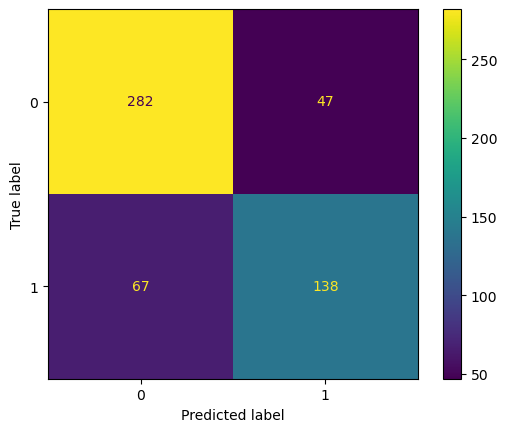

In [30]:
plot_confusion_matrix(knn10, X_train, y_train)

In [31]:
print(classification_report(y_train, y_pred10))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       329
           1       0.75      0.67      0.71       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.77       534
weighted avg       0.78      0.79      0.78       534



# 5
Run through steps 1-3 setting k to 20



In [32]:
#make the thing
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
#fit it
knn20.fit(X_train, y_train)
#predict
y_pred20 = knn20.predict(X_train)
y_pred20[:5]

array([0, 1, 0, 0, 0])

In [33]:
knn20.score(X_train, y_train)

0.7490636704119851

In [34]:
conf20 = confusion_matrix(y_train, y_pred20)
conf20

array([[279,  50],
       [ 84, 121]])

In [35]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [36]:
pd.DataFrame(conf20,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,279,50
1_actual,84,121


In [37]:
# Survived = positive
TP = 110
TN = 287
FP = 42
FN = 95

acc = (TP+TN)/(TP+TN+FP+FN)
total = (TP+TN+FP+FN)
true_positive_rate = TP/(total)
false_positive_rate = FP/(total)
true_negative_rate = TN/(total)
false_negative_rate = FN/(total)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = (2 * (precision * recall) / (precision + recall))
support_pos = FN + TP
support_neg = TN + FP

print('acc =',acc)
print('true positive rate =',true_positive_rate) 
print('true negative rate =', true_negative_rate)
print('false positive rate =', false_positive_rate)
print('false negative rate =', false_negative_rate)
print('precision =',precision)
print('recall =',recall)
print('f1 score =', f1_score)
print('positive support =', support_pos)
print('negative support =', support_neg)

acc = 0.7434456928838952
true positive rate = 0.20599250936329588
true negative rate = 0.5374531835205992
false positive rate = 0.07865168539325842
false negative rate = 0.17790262172284643
precision = 0.7236842105263158
recall = 0.5365853658536586
f1 score = 0.6162464985994398
positive support = 205
negative support = 329


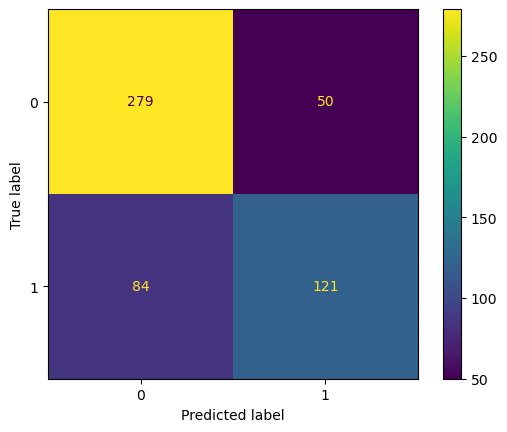

In [38]:
plot_confusion_matrix(knn20, X_train, y_train)

In [39]:
print(classification_report(y_train, y_pred20))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       329
           1       0.71      0.59      0.64       205

    accuracy                           0.75       534
   macro avg       0.74      0.72      0.72       534
weighted avg       0.75      0.75      0.74       534



# 6
What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?


- knn 10 is better than knn 20because it predicted less false positives, and more true positives.

# 7
Which model performs best on our out-of-sample data from validate?

## Analyze knn10

In [40]:
knn10.score(X_train, y_train)

0.7865168539325843

In [41]:
knn10.score(X_validate, y_validate)

0.7303370786516854

In [42]:
(knn10.score(X_train, y_train))-(knn10.score(X_validate, y_validate))

0.0561797752808989

## Analyze knn20

In [43]:
knn20.score(X_train, y_train)

0.7490636704119851

In [44]:
knn20.score(X_validate,y_validate)

0.702247191011236

In [45]:
(knn20.score(X_train, y_train))-(knn20.score(X_validate, y_validate))

0.04681647940074907

## Result of analysis
- knn10 has higher accuracy with the less difference between train and validate sets. knn10 is the better model out of these two.

# for fun

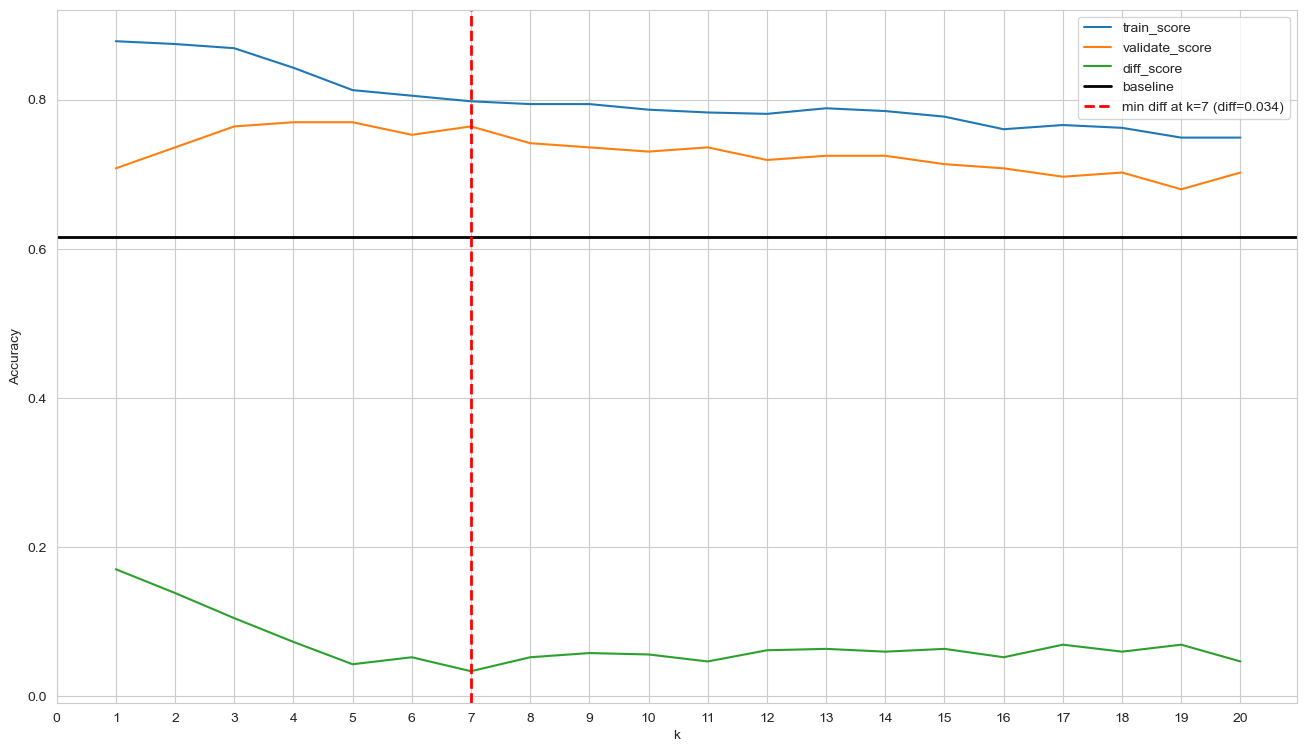

,k,train_score,validate_score,diff_score
0,1,0.878277,0.707865,0.170412
1,2,0.874532,0.735955,0.138577
2,3,0.868914,0.764045,0.104869
3,4,0.842697,0.769663,0.073034
4,5,0.812734,0.769663,0.043071
5,6,0.805243,0.752809,0.052434
6,7,0.797753,0.764045,0.033708
7,8,0.794007,0.741573,0.052434
8,9,0.794007,0.735955,0.058052
9,10,0.786517,0.730337,0.056180


In [49]:
knear.k_nearest2(X_train, y_train, X_validate, y_validate)